In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [ ]:
data_train = pd.read_csv('Life_train.csv')
data_test = pd.read_csv('Life_test.csv')

In [ ]:
data_train.head(5)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2489 non-null   int64  
 1   Life expectancy                  2489 non-null   float64
 2   Adult Mortality                  2489 non-null   float64
 3   infant deaths                    2489 non-null   int64  
 4   Alcohol                          2322 non-null   float64
 5   percentage expenditure           2489 non-null   float64
 6   Hepatitis B                      2009 non-null   float64
 7   Measles                          2489 non-null   int64  
 8    BMI                             2461 non-null   float64
 9   under-five deaths                2489 non-null   int64  
 10  Polio                            2471 non-null   float64
 11  Total expenditure                2293 non-null   float64
 12  Diphtheria          

In [ ]:
# data_train.isnull().sum()

data_null = pd.DataFrame()
data_null['na'] = data_train.isnull().sum() / len(data_train) * 100
data_null = data_null[data_null['na']>0]
data_null
# у кого бoльшой % значит удаляем
# - пропуски заменяются ток значениями из train

,na
Alcohol,6.709522
Hepatitis B,19.284853
BMI,1.124950
Polio,0.723182
Total expenditure,7.874648
Diphtheria,0.723182
GDP,15.508236
Population,22.257935
thinness 1-19 years,1.124950
thinness 5-9 years,1.124950


In [ ]:
columns_all = data_train.columns
columns_for_change = data_null.index
columns_for_change

Index(['Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
for i in columns_for_change:
  print(data_train[i].value_counts())

Alcohol
0.01    231
0.03     15
0.04     11
0.02     10
0.06     10
       ... 
2.19      1
2.59      1
2.30      1
2.46      1
2.44      1
Name: count, Length: 996, dtype: int64
Hepatitis B
99.0    209
98.0    173
96.0    135
97.0    130
95.0    127
       ... 
24.0      1
16.0      1
33.0      1
26.0      1
12.0      1
Name: count, Length: 85, dtype: int64
 BMI 
58.5    14
59.9    14
59.3    13
57.0    13
54.2    13
        ..
66.9     1
11.3     1
1.9      1
1.0      1
42.5     1
Name: count, Length: 586, dtype: int64
Polio
99.0    326
98.0    206
97.0    183
96.0    164
95.0    143
       ... 
35.0      1
17.0      1
23.0      1
32.0      1
33.0      1
Name: count, Length: 73, dtype: int64
Total expenditure
4.60     14
6.70     11
5.29      9
5.64      9
5.92      9
         ..
11.71     1
11.00     1
9.91      1
3.51      1
7.95      1
Name: count, Length: 787, dtype: int64
Diphtheria 
99.0    307
98.0    208
97.0    175
96.0    165
95.0    163
       ... 
56.0      1
2.0       1


In [ ]:
# 'Alcohol',
# 'Hepatitis B',
# ' BMI ', индекс массы тела
# 'Polio', болезнь
# 'Total expenditure', Сумма операционных расходов
# 'Diphtheria ',
# 'GDP', Валовой внутренний продукт
# 'Population',
# ' thinness  1-19 years', худоба
# ' thinness 5-9 years', худоба
# 'Income composition of resources', Безусловный базовый доход - 0 - было
# 'Schooling'


# data_train["Alcohol"].fillna(0.000, inplace=True)
# data_test["Alcohol"].fillna(0.000, inplace=True)

# # # # GDP = 1
# # # # Population = 1
# # # # Income composition of resources = 0.000 mode

# data_train["GDP"].fillna(1, inplace=True)
# data_test["GDP"].fillna(1, inplace=True)

# data_train["Population"].fillna(1, inplace=True)
# data_test["Population"].fillna(1, inplace=True)

# data_train["Income composition of resources"].fillna(0.000, inplace=True)
# data_test["Income composition of resources"].fillna(0.000, inplace=True)

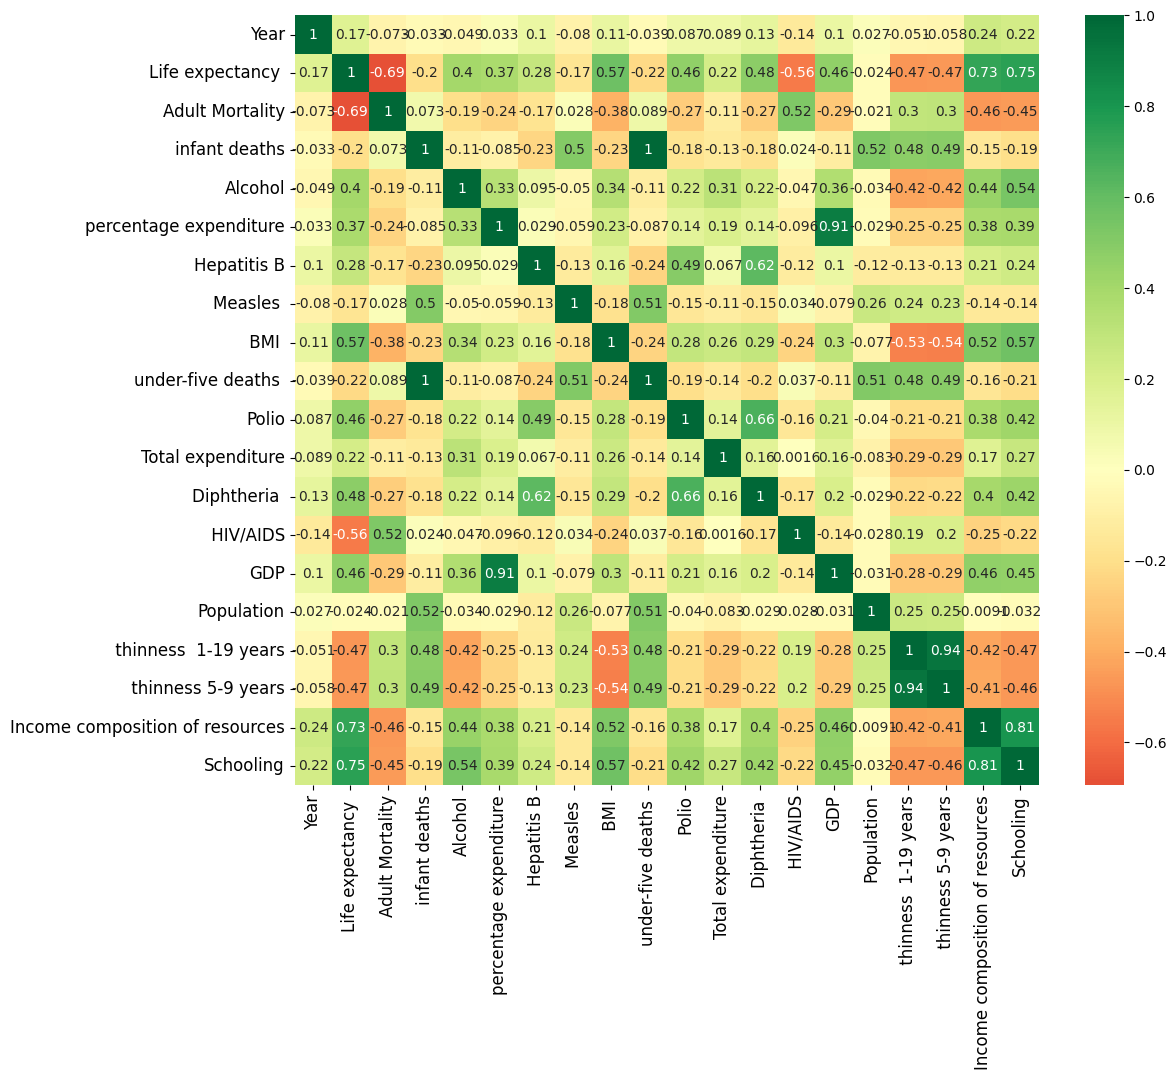

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data_train.corr(),
            xticklabels=data_train.corr().columns,
            yticklabels=data_train.corr().columns,
            cmap='RdYlGn',
            center=0,
            annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# data_train.drop(columns=['Hepatitis B', 'Total expenditure', 'GDP', 'Population'], inplace=True)
# data_test.drop(columns=['Hepatitis B', 'Total expenditure', 'GDP', 'Population'], inplace=True)

In [ ]:
# отсальное запомлним медианами
data_train.fillna(data_train.median(), inplace=True)
data_test.fillna(data_train.median(), inplace=True)

In [ ]:
target_col = 'Life expectancy '
X = data_train.drop(columns=target_col)
y = data_train[target_col]

In [ ]:
# нормализация числовых признаков
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = StandardScaler()
mmsc = MinMaxScaler()

X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

X_norm = mmsc.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=42)

In [ ]:
# обучение модели
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

print("MSE_main", metrics.mean_squared_error(y_test, y_pred))
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Score:", model.score(X_test, y_test))

MSE_main 15.746651213296175
MAE 2.9886094181747214
Score: 0.8384051742195644


In [ ]:
X_test = data_test.values
X_test = std.fit_transform(X_test)

y_pred_test = model.predict(X_test)

submission = pd.DataFrame()
submission['index'] = data_test.index
submission['Life expectancy'] = y_pred_test
submission.to_csv('./my_submission.csv', index = False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
